# Computer Vision
## Exercise Sheet 1: Imaging
### Erhardt Barth / Christoph Linse / Manuel Laufer / Kathleen Anderson
Universität zu Lübeck, Institut für Neuro- und Bioinformatik

In case of questions, contact us via email: *{erhardt.barth, c.linse, m.laufer, k.anderson} @uni-luebeck.de*

## Note: Please insert the names of all participating students:

1. 
2. 
3. 
4. 
5. 


In [1]:
import sys, os
if 'google.colab' in sys.modules:
  if os.getcwd() == '/content':
    !git clone 'https://github.com/inb-luebeck/cs4250.git'
    os.chdir('cs4250')

In [2]:
import cv2 # open cv
import matplotlib.pyplot as plt # plotting tools
import numpy as np # matrix, array operations

from os.path import join # combine different items to a path
from os import getcwd, listdir # shows the current directory, lists items in a directory

# show plots when running cell
%matplotlib inline 

## Exercise 1.1
### Loading and displaying images in Python
Download the image `clown.png` from the website of the tutorial. Load
the image in Python via opencv (`cv2.imread`). By default the image is loaded as BGR (blue, green, red), convert the image to gray with `cv2.cvtColor`.
Display the image `plt.imshow`, use the colormap `gray`.

In [4]:
# TODO: define image path
img_path = "./data/exercise_1/clown.png"

# TODO: read image
img_raw = cv2.imread(img_path)

# TODO: convert image to grayscale
img_grayscale = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)

# TODO: display image
cv2.imshow('grayscale image', img_grayscale)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Exercise 1.2
### Image gradients
Images are stored as `numpy arrays`, for further computations convert the array to range $[0, 1]$ (`astype`). Define a function `load_gray_normalized` that loads the image, converts it to grayscale and normalizes it.
Compute the image gradients $d_x$ and $d_y$ for the image from the previous assignment. Initialize a simple gradient kernel like $[-1, 0, +1]$ for $d_x$ (`np.zeros`, `np.array`) and filter the image with it (`cv2.filter2D`). Visualize the results using `plt.imshow`. To this end, display the resulting images of both derivatives along `x` and `y` in a single figure (`plt.subplots`).

What do you need to take care of, to be able to visually **compare** the results?
Hint: the problem is related to the range of the pixel values in the two 
gradient images. Name the problem and propose a solution to it by using the options of the `plt.imshow`
function. 

In [7]:
def load_gray_normalized(image_path):
    
    img_raw = cv2.imread(image_path)
    img_grayscale = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)
    img_float = img_grayscale.astype(np.float32) 
    normalized_image = img_float / 255.0
    
    return normalized_image


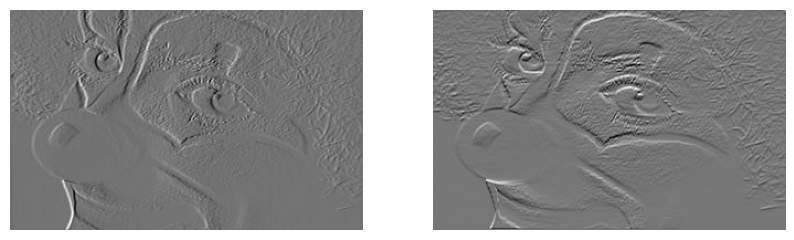

In [13]:
# TODO: load image
img_gray_normalized = load_gray_normalized(img_path)
# TODO: define kernels
kernel_x = np.array([-1, 0, 1]).reshape(1, 3)
kernel_y = np.array([-1, 0, 1]).reshape(3, 1)  # Vertical gradient (3x1 kernel)

# TODO: filter images
dx = cv2.filter2D(img_gray_normalized, -1, kernel_x)
dy = cv2.filter2D(img_gray_normalized, -1, kernel_y)
# TODO: display images
fix, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(dx, cmap='gray')
axes[0].axis('off')
axes[1].imshow(dy, cmap='gray')
axes[1].axis('off')

plt.show()
plt.close()

## Exercise 1.3
### Point operations
Download from the website the images `ueb131.png` and `ueb132.png`, 
then load and display them.  
Both images illustrate two commonly encountered problems in photography. 
Underexposed (overexposed) images are darker (brighter) than they should be, 
because they have been exposed to too little (too much) light. 

Compute and display the histograms (`plt.hist`,`np.flatten`) of the images in range $[0,1]$. Write a function `display_with_hist` that creates two subplots, showing the image and the respective histogram.

Can you identify the exposure problems in the histograms?
Hint: look at how the pixel intensities are distributed. 

These defects can be corrected by remapping the pixel values to achieve a 
more evenly distributed range of pixel intensities. 
This can either be done by using histogram equalization (`cv2.equalizeHist`) or by using the logarithmic and power functions.

To use `cv2.equalizeHist`, the images need to be casted to uint8 in $[0,255]$. Write a function `normalized_to_uint8` to do this.

Apply the logarithmic and power to improve the two images. Experiment with different bases for the logarithm and power. To get a better feeling for the problem, plot the functions $x^2$ in $[0,1]$ and $log(x)$ in $[1,255]$ (why not $[0, 255]$?, `np.linspace, np.log, plt.plot`). **Where do the functions change quickly, where do they change slowly? How can you use this knowledge to improve the images?**

In [14]:
def display_with_hist(image):
    # Ensure the image is in float32 format
    if image.dtype != np.float32:
        image = image.astype(np.float32)
    
    # Normalize the image if necessary
    if (np.max(image) > 1) or (np.min(image) < 0):
        # Normalize the image to [0, 1] using cv2.normalize
        norm_image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    else:
        norm_image = image

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Display the image
    axes[0].imshow(norm_image, cmap='gray')
    axes[0].axis('off')
    
    # Flatten the image values for histogram
    vals = norm_image.flatten()
    
    # Debug: Print max and min values of the image
    print(f"Normalized image max value: {np.max(vals)}, min value: {np.min(vals)}")
    
    # Use bins and range that cover all potential values
    bins = np.linspace(0, 1, 256)
    
    # Plot histogram
    axes[1].hist(vals, bins=bins, edgecolor='black', log=True)
    axes[1].set_xlim([0, 1])
    
    plt.show()
    plt.close()



In [10]:
def normalized_to_uint8(image):
    return (image * 255).astype(np.uint8)

Min: 0 Max: 255 Type: uint8
Min: 0 Max: 255 Type: uint8
Normalized image max value: 1.0, min value: 0.0


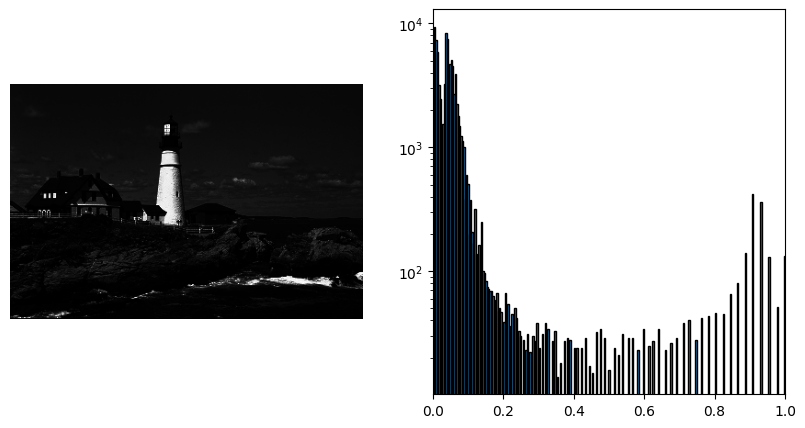

Normalized image max value: 1.0, min value: 0.0


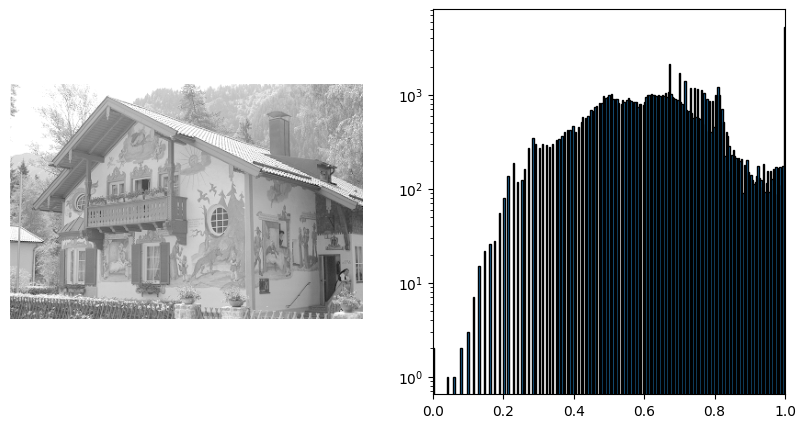

In [15]:
# TODO: load images
img1_path = "./data/exercise_1/ueb131.png"
img2_path = "./data/exercise_1/ueb132.png"

img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)
print("Min:", img1.min(), "Max:", img1.max(), "Type:", img1.dtype)
print("Min:", img2.min(), "Max:", img2.max(), "Type:", img2.dtype)


# TODO: display images with histograms
display_with_hist(img1)
display_with_hist(img2)


Normalized image max value: 1.0, min value: 0.0


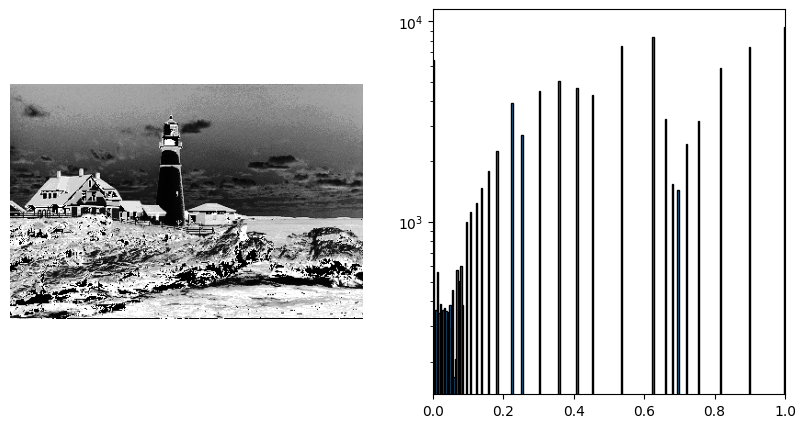

Normalized image max value: 1.0, min value: 0.0


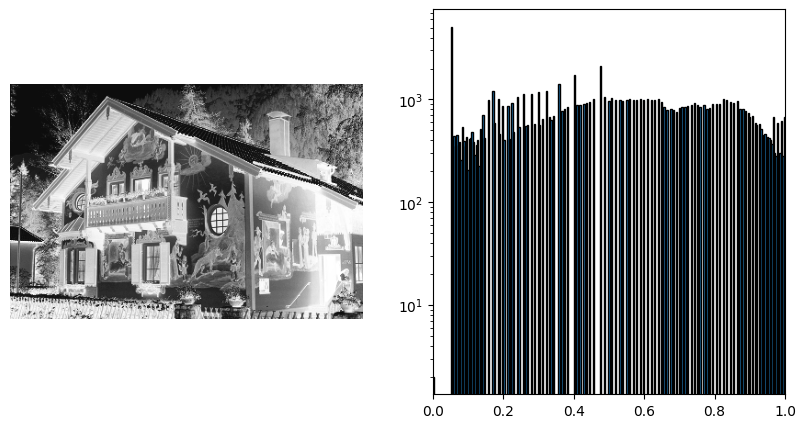

In [16]:
# TODO: convert images to uint8
img1_uint8 = normalized_to_uint8(img1)
img2_uint8 = normalized_to_uint8(img2)

# TODO: equalize histogram and display
equalized_image = cv2.equalizeHist(img1_uint8)
display_with_hist(equalized_image)

equalized_image = cv2.equalizeHist(img2_uint8)
display_with_hist(equalized_image)


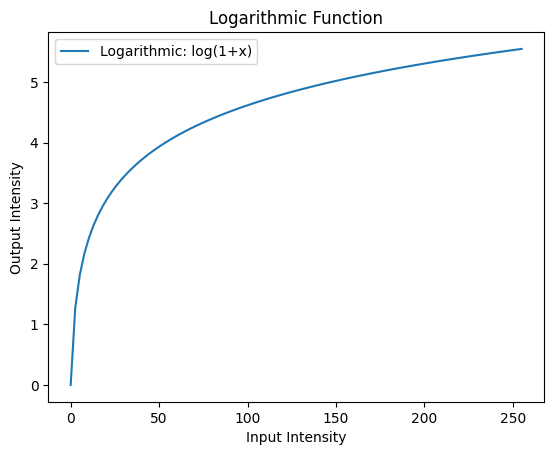

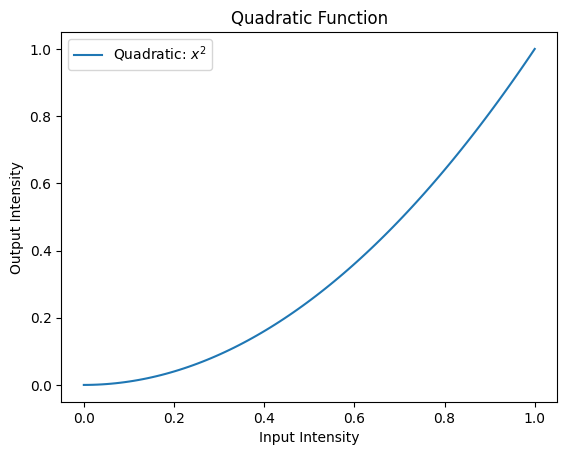

In [36]:
# TODO: display logarithmic function
x = np.linspace(0, 255, 100)
y_quad = np.power(x, 2)

y_log = np.log1p(x)  # log1p is log(1 + x), to shift the domain to handle zero
plt.figure()
plt.plot(x, y_log, label='Logarithmic: log(1+x)')
plt.title('Logarithmic Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.legend()
plt.show()

# TODO: display quadratic function
x = np.linspace(0, 1, 100)
y_quad = np.power(x, 2)
plt.figure()
plt.plot(x, y_quad, label='Quadratic: $x^2$')
plt.title('Quadratic Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.legend()
plt.show()


Normalized image max value: 1.0, min value: 0.0


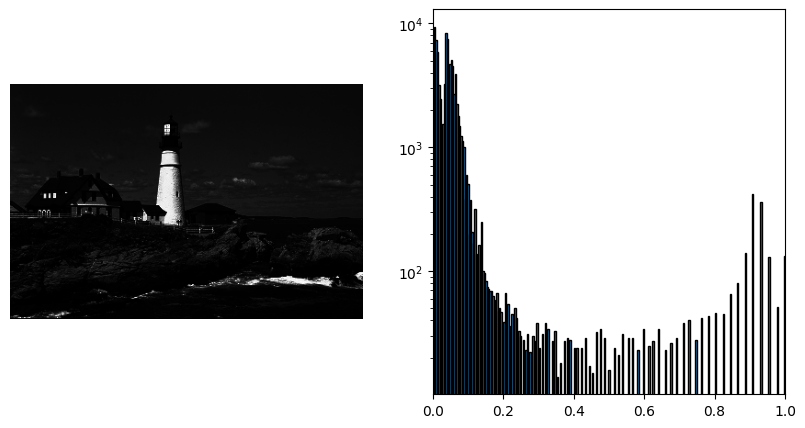

Normalized image max value: 1.0, min value: 0.0


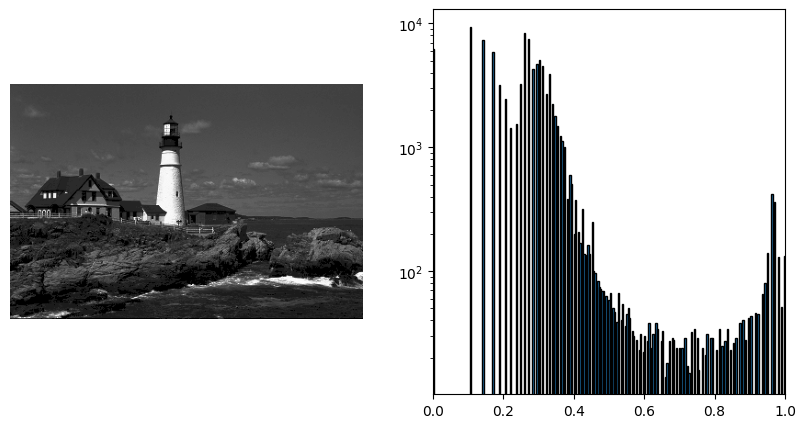

Normalized image max value: 1.0, min value: 1.6133995472955576e-08


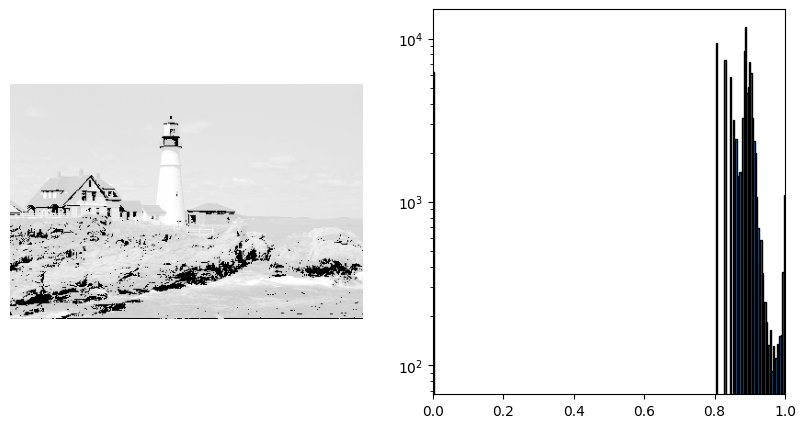

[[ 2.07944294e+00  2.07944294e+00  2.07944294e+00 ...  2.07944294e+00
   1.94591146e+00  2.07944294e+00]
 [ 2.19722606e+00  2.07944294e+00  2.19722606e+00 ...  2.07944294e+00
   1.94591146e+00  2.07944294e+00]
 [ 2.19722606e+00  2.07944294e+00  2.19722606e+00 ...  2.07944294e+00
   2.07944294e+00  2.19722606e+00]
 ...
 [ 3.09104453e+00  3.85015019e+00  3.43398951e+00 ...  1.00000076e-10
   1.00000076e-10  6.93147647e-01]
 [ 2.94444096e+00  2.99573429e+00  2.83321525e+00 ...  6.93147647e-01
   6.93147647e-01  1.00000076e-10]
 [ 1.00000076e-10  1.00000076e-10  6.93147647e-01 ... -2.30258664e+01
  -2.30258664e+01 -2.30258664e+01]]


In [34]:
# TODO: transform and display ueb131.png
#normalized_img1 = 
display_with_hist(img1)
img1_power = np.power(img1, 0.4)
display_with_hist(img1_power)
base = 2.71828
img1_log = np.log(img1 + 1e-10) / np.log(base)  # = [3, 4]display_with_hist(img2_log)
display_with_hist(img1_log)
print(img1_log)

Normalized image max value: 1.0, min value: 0.0


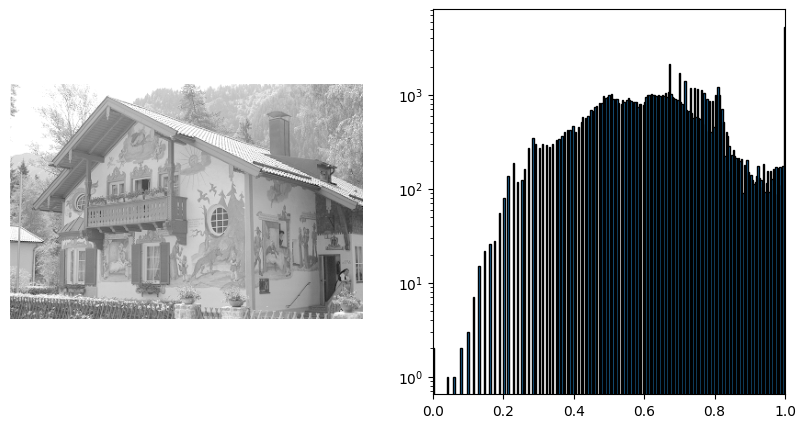

Normalized image max value: 1.0, min value: 0.0


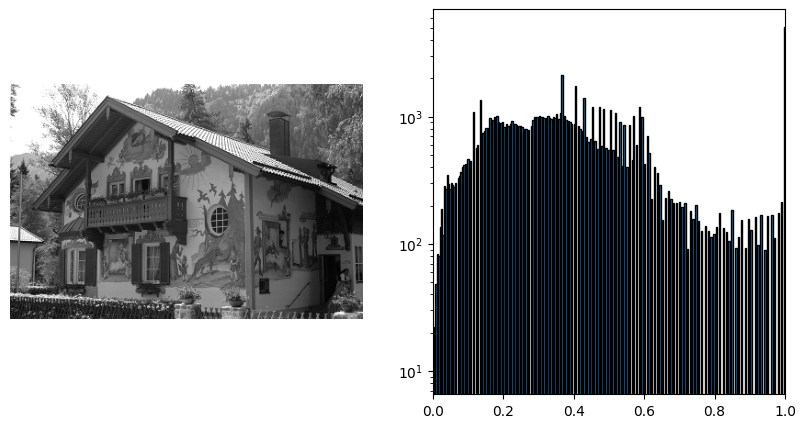

Normalized image max value: 1.0, min value: 1.6133995472955576e-08


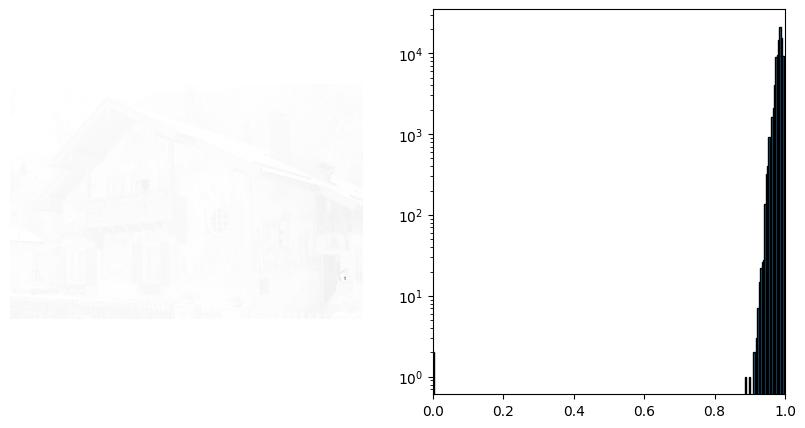

In [35]:
# TODO: transform and display ueb132.png
display_with_hist(img2)
img2_power = np.power(img2, 2.5)
display_with_hist(img2_power)
base = 2.71828 # Major change at 1, 0.999 too dark, 1.00001 too bright
img2_log = np.log(img2 + 1e-10) / np.log(base)  # = [3, 4]display_with_hist(img2_log)
display_with_hist(img2_log)
